#  In Depth: Principal Component Analysis (PCA)

# 深入：主成分分析

> In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA).PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

本節我們將討論使用最廣泛的無監督學習(在沒有已知標籤的情況下聚焦在數據的有意義特徵上)算法，主成分分析。PCA本質上是一個降維算法，它也可以作為可視化、過濾噪音、特徵提取和特徵工程等方面的工具。透過線性變化的方式，儘量保留彼此之間不同的成分，而且是一個可以回推每個維度代表原始維度組成比例的方式。

## Introducing Principal Component Analysis

## 主成分分析簡介

> Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data, which we saw briefly in [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb).Its behavior is easiest to visualize by looking at a two-dimensional dataset.Consider the following 200 points: By eye, it is clear that there is a nearly linear relationship between the x and y variables.This is reminiscent of the linear regression data we explored in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb), but the problem setting here is slightly different: rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

主成分分析是一個快速而靈活的無監督學習算法，主要用於降低數據的維度，在下面二維數據集中，能更方便我們理解PCA。例如下面200個數據點：肉眼就能觀察到x和y變量之間的線性關係。我們希望模型能夠學習到x和y值之間的*關聯(relationship)*。

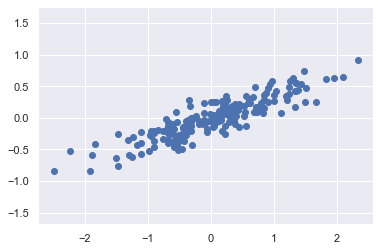

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

> In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:The fit learns some quantities from the data, most importantly the "components" and "explained variance":

在主成分分析(PCA)中，這種關聯關係被量化成在數據中找到一個*主要特徵軸*，然後使用這些軸來描繪數據集。使用`PCA`評估器，擬合過程從數據中學習到了一些定量指標，最重要的是其中的“成分(components)”和“可解釋方差(explained variance)”：

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [3]:
print("components:",pca.components_)
print("explained variance:",pca.explained_variance_)

components: [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
explained variance: [0.7625315 0.0184779]


>let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

- 使用 “成分(components)” 來確定矢量的方向(direction of the vector)
- 使用 “可解釋方差(explained variance)”來確定矢量的長度(squared-length of the vector)

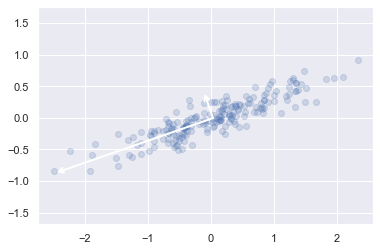

In [4]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

> These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.The projection of each data point onto the principal axes are the "principal components" of the data.If we plot these principal components beside the original data, we see the plots shown here: This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling. While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

矢量代表著數據的*主要特徵軸*，而矢量的長度代表著這個軸對於數據的分佈起到了*多重要*的作用，更精確來說，這是數據被投射到這個軸上時方差的度量。將每個數據點投射到主要特徵軸上被稱為數據的“主要成分”。如果我們將主要成分畫在原始數據旁邊，會得到下圖：這種將數據軸變換成主要特徵軸的方法被稱為*仿射變換(affine transformation)*，仿射變換基本上上可以通過轉換、旋轉和統一比例完成。

![](figures/05.09-PCA-rotation.png)
[附录中生成图像的代码](06.00-Figure-Code.ipynb#Principal-Components-Rotation)

### PCA as dimensionality reduction 使用PCA降維

> Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

使用PCA降維主要包括將一個或多個次要成分從數據中移除，從而獲得數據的一個低維度的映射並保留最大化的數據差異。

In [5]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


> The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

轉換後的數據被減成了一維。要理解降維的效果，我們可以將數據進行逆轉換並將它們沿著原始數據的方向繪製在圖中：

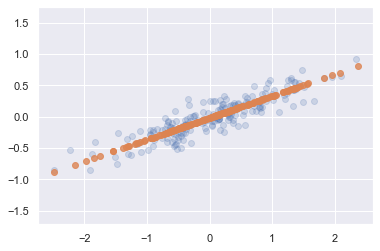

In [6]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

> The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

淺色的點代表原始數據，而深色的點是放射變換的得到的數據。PCA降維的含義：沿著非重要維度上的信息都被移除了，只留下了具有高差異性維度上的數據。被移除的差異部分（按比例體現在圖中深色線的數據點分佈情況中）是降維操作中多少*信息*被丟棄了的粗略衡量。

> This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

降維後的數據集與原始數據點之間，在某種程度上具有“足夠”重要關聯的編碼表達：雖然將數據的維度減少了一半，但是數據點之間的整體聯繫大部分被保留了下來。

### PCA for visualization: Hand-written digits

### 使用PCA進行可視化：手寫數字

> The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.To see this, let's take a quick look at the application of PCA to the digits data we saw in [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb).

當數據僅有兩個維度時，降維的效果並不明顯，但是在高維度數據的情況下，這個操作的威力就體現出來了。為了展示這點，讓我們將PCA應用在手寫數字數據上，我們在[深入：決策樹和隨機森林](05.08-Random-Forests.ipynb)中已經看到過它的應用。

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

> Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

我們前面知道數據是由8x8像素的圖像構成，這表示數據共有64個維度。要獲得這些數據點之間的內在聯繫，我們可以使用PCA將它們投射到更容易管理的維度數量上，例如2：

In [8]:
pca = PCA(2)  # 將64維數據投射到2維上
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


> We can now plot the first two principal components of each point to learn about the data:

然後我們就可以將數據的兩個主成分繪製在下圖中：

/var/folders/9q/486czkcn7lv5v0hwbt71twdc0000gn/T/ipykernel_1469/3657097047.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


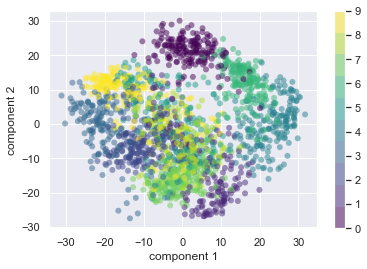

In [9]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

> Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

回憶一下這些成分的含義：完整的數據是64維的數據點組成的雲，上圖中的點是每個數據點投射到最大差異方向上的投射點。或者說基本上，我們找到了通過最優的拉伸和旋轉將64維數據展示在2維上的方式，並且採取的是一種無監督的手段，也就是沒有任何的標籤參考。

### What do the components mean 成分的內在涵義

> This meaning can be understood in terms of combinations of basis vectors.
For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

降維之後的結果究竟有什麼意義。我們可以通過基本矢量的組合來理解它。例如訓練集中的每張圖像都是64個像素值的集合，我們把它稱為$x$：

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$


> One way we can think about this is in terms of a pixel basis.
That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

用計算機圖像基礎術語來說的話，就是要構成一張圖像，我們將上面的向量中的每個元素乘上它所代表的像素點，然後將這些結果加起來就能得到圖像：

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

> One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors.
For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

可以認為降維就是將除了需要保留的基礎矢量外的部分全部移除。例如如果我們僅使用前面8個像素，我們就能得到8維的數據投射，但是結果並不能完整展示原圖：因為我們丟棄了接近90%的像素。

![](figures/05.09-digits-pixel-components.png)
[附录中生成图像的代码](06.00-Figure-Code.ipynb#Digits-Pixel-Components)

> The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image.
Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image.
Were we to continue this sequence and use all 64 pixels, we would recover the original image.

上圖中第一行展示的是單獨的像素點，第二行展示的是對應的像素點加入後對累計求和結果產生的影響。僅使用8個像素點基礎成分時，我們只能構建64像素圖像的一小部分。繼續這個過程將所有64個像素相加後，我們就能恢復原始圖像。

> But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

但是逐個像素點的表示方式不是唯一的選擇。我們可以使用其他的基本函數，其中包含著每個像素對圖像的預設影響值，比方說

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

> PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.
The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.
This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:

PCA可以想像成選擇最優的基本函數，在這個函數當中只需要將頭幾項相加就能重建數據集的主要部分。主成分作為數據的低維度表示，其實就是這個函數當中的頭幾項的係數。下圖展示了使用平均值加上頭8個PCA基本函數後重建的圖像情況：

![](figures/05.09-digits-pca-components.png)
[附录中生成图像的代码](06.00-Figure-Code.ipynb#Digits-PCA-Components)

> Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components!
The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example.
This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

不同於圖像的像素表達，PCA允許我們僅使用平均值加上8個成分就還原了原始圖像中的顯著特徵。還原圖中的每個像素都是我們二維例子中矢量疊加後的直接結果。 PCA提供低維度數據表示方法的其實就是，它找到了一組基本函數能比輸入數據的原始像素圖方式更有效的表示圖像。

### Choosing the number of components 選擇成分的數量

> A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

在實踐中使用PCA的一個重要技巧是估算需要多少個成分來描述數據。這可以通過查看*可解釋方差比例*來決定：

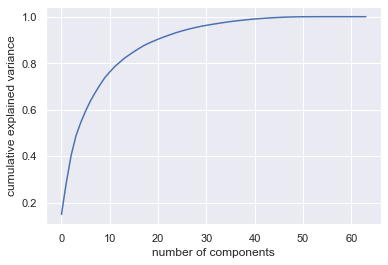

In [10]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

> This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

這條曲線量化了在64維中前$N$個成分的可解釋方差佔比。例如我們看到使用前10個成分時可解釋方差佔比為75%，而成分數量需要到達50個左右時，這個比例才能接近100%。

> Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

由上圖我們也看到我們的二維投射損失了很多的信息（由可解釋方差衡量）我們需要大概20個成分才能獲得90%的可解釋方差佔比。將這個圖應用在高維度的數據集上時，能幫助你理解不同維度情況下數據的冗餘度情況。

## PCA as Noise Filtering

## 使用PCA去噪

> PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

對於在數據中過濾掉噪音來說PCA也是一個好的方法。這其中的原理是：任何具有較大差異的成分相對來說都不會受到噪音的影響。因此如果你通過保留大部分主成分來重建數據集的話，應該能達到較好的去噪效果。

> Let's see how this looks with the digits data.
First we will plot several of the input noise-free data:

讓我們來看看它在手寫數字數據集中的表現。首先繪製無噪音情況下的數字：

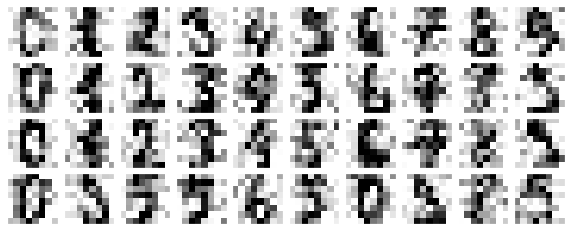

In [11]:
#無噪音數字  noise-free 
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
#plot_digits(digits.data)

#加上隨機噪音 add some random noise 
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

> Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance: Here 50% of the variance amounts to 12 principal components.
Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:


在噪音數據上使用PCA，保留50%的可解釋方差：輸出告訴我們，只需要使用12個主成分就可以保留50%的可解釋方差。然後我們進行仿射變換，先轉換成主成分，再逆轉換回來，就可以重建過濾掉噪音後的數字：

In [12]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

> This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

這個保留信號或過濾噪音的特性使得PCA在特徵選擇過程中非常有用，例如，與其在非常高維度數據上訓練一個分類器，你倒不如在數據的低維度表示中去進行訓練，這樣做的好處是數據中的隨機噪音已經被過濾掉了。

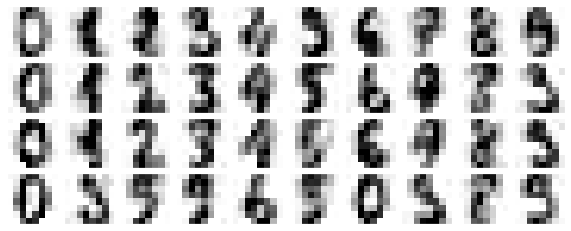

In [13]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Example: Eigenfaces

## 例子：特徵臉譜

> Earlier we explored an example of using a PCA projection as a feature selector for facial recognition with a support vector machine (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)).
Here we will take a look back and explore a bit more of what went into that.

前面章節使用支持向量機（參見[深入：支持向量機](05.07-Support-Vector-Machines.ipynb)）來進行人臉識別，這裡我們採用PCA作為特徵選擇器。下面我們來回顧一下，並且進行更深入的探索。

In [14]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


> Let's take a look at the principal axes that span this dataset.
Because this is a large dataset, we will use ``RandomizedPCA``—it contains a randomized method to approximate the first $N$ principal components much more quickly than the standard ``PCA`` estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000).
We will take a look at the first 150 components:

讓我們首先查看一下這個數據集的主要成分。因為這是一個較大的數據集，我們會使用`RandomizedPCA`，這個方法會使用一個隨機的方法來估算數據集的前$N$個主成分，它比標準的`PCA`評估器要快的多，因此在高維度數據中很有用（本數據集中維度接近3000）。我們看一下前150個主要成分：

In [15]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150, svd_solver='randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

> In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors,"
so these types of images are often called "eigenfaces").
As you can see in this figure, they are as creepy as they sound:

然後我們將這些提取出主成分的圖像可視化出來，會得到很有趣的結果（這些成分在技術上被成為“特徵向量”，因此這些圖像經常被稱為“特徵臉譜”）。正如你下面看到的，這些圖像看起來很怪異：

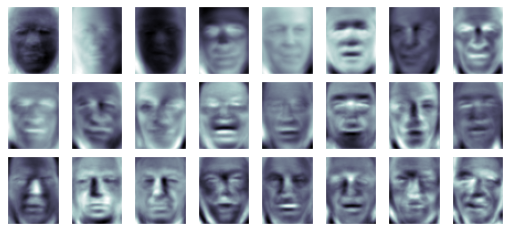

In [16]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

> The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.
Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

這些結果很有意思，它們為我們提供了圖像內在的差異性：例如，左上角開始的幾張特徵臉譜看起來像是被不同角度的光照之下的結果，而後面的主要向量則似乎選擇了不同的臉部特徵，例如眼睛、鼻子和嘴唇等。然後我們看一下這些成分的可解釋方差的比例曲線，得到臉部信息保留比例的大概印象：

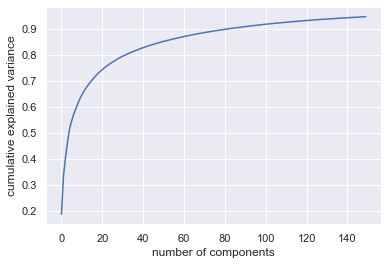

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

> We see that these 150 components account for just over 90% of the variance.
That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.
To make this more concrete, we can compare the input images with the images reconstructed from these 150 components:

結果表明150個成分已經保留了超過90%的差異。於是我們確信使用這150個主成分，就可以還原大部分數據的特徵了：

In [18]:
# 計算主成分和還原的圖像
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

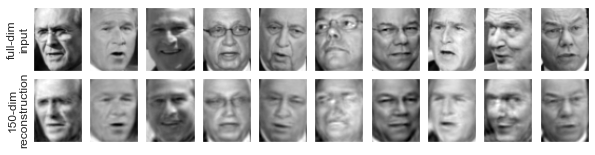

In [19]:
# 繪製結果
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

> The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features.
This visualization makes clear why the PCA feature selection used in [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb) was so successful: although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough information that we might, by eye, recognize the individuals in the image.
What this means is that our classification algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the particular algorithm we choose, can lead to a much more efficient classification.

第一行是原始圖像，第二行是通過約3000個初始特徵中選出的150個主要特徵還原得到的圖像。上面的結果很清晰的解釋了為什麼主成分分析選擇的特徵在[深入：支持向量機](05.07-Support-Vector-Machines.ipynb)當中應用得如此成功：雖然它將特徵的數量減少到初始數量的5%左右，但是它投射得到的圖像包含了足夠的信息，我們可以通過肉眼就分辨出每張圖的個體。這意味著我們的分類算法只需要在150維的數據上進行訓練，而不是在3000維數據上進行，這會極大提升分類器的性能。

## Principal Component Analysis Summary

## 主成分分析總結

> In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.
Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.
Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio).
Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

本節中我們討論了使用主成分分析進行降維、對高維數據可視化、去噪和高維數據特徵選擇的方法。因為PCA算法的可解釋性和靈活性，它在大範圍的情景和方法中展現了有效性。當面對一個高維數據集時，作者傾向於首先使用PCA來將數據點的關聯關係可視化出來（正如我們在手寫數字中做的那樣），然後試圖找到數據中的最主要的可解釋方差（正如我們在特徵臉譜中做的那樣），還有用來理解數據的固有維度量（通過繪製可解釋方差比率）。當然PCA也不太適用於非常高維度的數據集，但是它提供了一個直接和有效的探視高維度數據內部特徵的途徑。

> PCA's main weakness is that it tends to be highly affected by outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a couple interesting variants on PCA, including ``RandomizedPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.
``RandomizedPCA``, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while ``SparsePCA`` introduces a regularization term (see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb)) that serves to enforce sparsity of the components.

PCA的主要缺點在於它容易受到數據中離群值的影響。正因為此，很多更加健壯的PCA變種被開發出來，其中很多都致力於迭代丟棄那些很少被初始成分影響的數據點。 Scikit-Learn也包含了一些PCA的有趣的變種，包括`RandomizedPCA`和`SparsePCA`，它們也位於`sklearn.decomposition`包中。 `RandomizedPCA`我們上面用來在高維數據中快速的近似的找到主要成分，而`SparsePCA`通過引入一個正則項（參見[深入：線性回歸](05.06-Linear-Regression.ipynb)）來強制讓成分變得稀疏。

> In the following sections, we will look at other unsupervised learning methods that build on some of the ideas of PCA.

在下面章節中，我們還會看到其他的一些構建在PCA理論基礎上的無監督學習的方法。

<!--NAVIGATION-->
< [深入：决策树和随机森林](05.08-Random-Forests.ipynb) | [目录](Index.ipynb) | [深入：流形学习](05.10-Manifold-Learning.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


### Example

In [20]:
import pandas as pd
import seaborn as sns
data=pd.read_csv('input/Iris.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'input/Iris.csv'

In [ ]:
#Splitting the dependent and independent variables
X=data.iloc[:,:-1]
Y=data['class']
print("Shape of X is ",X.shape)
print("Shape of Y is ",Y.shape)

In [ ]:
#Spiltting dataset into train and tests
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0 )
print('Shape of X_train is ', X_train.shape)
print('Shape of X_test is ', X_test.shape)
print('Shape of Y_train is ', Y_train.shape)
print('Shape of Y_test is ', Y_test.shape)

In [ ]:
#Standardization

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
x_train_pca = pca.fit_transform(X_train_sc)
x_test_pca = pca.transform(X_test_sc)

In [ ]:
#This result the variance explained by the number of components taken into account

pca.explained_variance_ratio_.cumsum()  # result of 成分(components) & 可解釋方差(explained variance)”：

In [ ]:
df=pd.DataFrame({'x_train_pca0':x_train_pca[:,0],'x_train_pca1':x_train_pca[:,1],'Species':Y_train})
df

In [ ]:
sns.scatterplot( df['x_train_pca0'], df['x_train_pca1'],hue=df['Species'])

### Example PCA(Principal Component Analysis)

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris_feature = iris.iloc[:,:4]

from sklearn.decomposition import PCA
pca = PCA(n_components=2, copy=True, whiten=False) # 建立轉換器
iris_pca = pca.fit_transform(iris_feature) # 轉換
df_tsne = pd.DataFrame({"Dim1":iris_pca[:,0],
                        "Dim2":iris_pca[:,1],
                        "Label": iris["species"]}) 
ax = sns.scatterplot(x="Dim1", y="Dim2", hue="Label",data=df_tsne)

### t-隨機鄰近嵌入法tSNE(t-distributed stochastic neighbor embedding)

使用條件機率和高斯分佈(低維時為t分佈)來定義高維和低維中樣本點之間的相似度

In [ ]:
# 建立tsne轉換器
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0,perplexity=3) # 困惑度慎選
iris_tsne = tsne.fit_transform(iris_feature)
df_tsne = pd.DataFrame({"Dim1":iris_tsne[:,0],
                        "Dim2":iris_tsne[:,1],
                        "Label": iris["species"]})
ax = sns.scatterplot(x="Dim1", y="Dim2", hue="Label",data=df_tsne)# 繪圖

### 奇異值分解SVD(singular value decomposition) 找到不同的特徵值

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
iris_svd = svd.fit_transform(iris_feature)
df_svd = pd.DataFrame({
    "Dim1":iris_svd[:,0],
    "Dim2":iris_svd[:,1],
    "Label": iris["species"]
})
ax = sns.scatterplot(x="Dim1", y="Dim2", hue="Label",
                  data=df_svd)

### 自組織映射SOM(Self-organizing map) 離散

In [ ]:
!pip install MiniSom

In [ ]:
# 建立SOM
import matplotlib.pyplot as plt
from minisom import MiniSom
som = MiniSom(x=20, y= 20, input_len= 4, random_seed=1)
som.train_batch(data=iris_feature.values.tolist(), num_iteration= 1000)

# 繪圖
plt.figure(figsize=(15,15))
plt.xlim(0, 10)
plt.ylim(10, 20)
for index, row in iris.iterrows():
    x,y = som.winner(list(row[:-1]))
    if row.species == "setosa":
        plt.text(x,y,"A",fontdict={'weight': 'bold', 'size': 10},color = "C1")
#         plt.plot(x,y,color = "C1")
    elif row.species == "versicolor":
        plt.text(x,y,"B",fontdict={'weight': 'bold', 'size': 10},color = "C3")
#         plt.plot(x,y,color = "C3")
    elif row.species == "virginica":
        plt.text(x,y,"C",fontdict={'weight': 'bold', 'size': 10},color = "C4")